In [1]:
import gymnasium as gym
import environment
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

In [9]:
env = gym.make('AirfoilEnv-v0', n_params=10, max_steps=10, scale_actions = 0.15, airfoil_seed = [0.1*np.ones(10), -0.1*np.ones(10), 0.0],
                    delta_reward=False, cl_reward = True, cl_reset = None, efficiency_param = 1, cl_wide = 20, render_mode="human")
model = PPO.load("models/200424/200424_GammaStudy_0.99/logs/best_model.zip", env=env)
#model = PPO.load("16042024_NewRewardCl_4_DeltaReward", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [14]:
# Evaluate the agent
# NOTE: If you use wrappers with your environment that modify rewards,
#       this will be reflected here. To evaluate with original rewards,
#       wrap environment in a "Monitor" wrapper before other wrappers.
mean_reward, std_reward = evaluate_policy(model, env=env, n_eval_episodes=15, deterministic=True)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:290.50 +/- 101.07


In [47]:
# Enjoy trained agent
vec_env = model.get_env()
obs = vec_env.reset()

Step: 0, Action: [[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.         -1.          0.68219566
  -1.         -1.         -1.         -1.         -1.         -1.
  -0.49362195 -0.23046891  0.5217751 ]], Reward: [0.00031799], Done: [False], Info: [{'step': 1, 'efficiency': 10.266539669127846, 'cl': 0.07950121666981602, 'TimeLimit.truncated': False}]


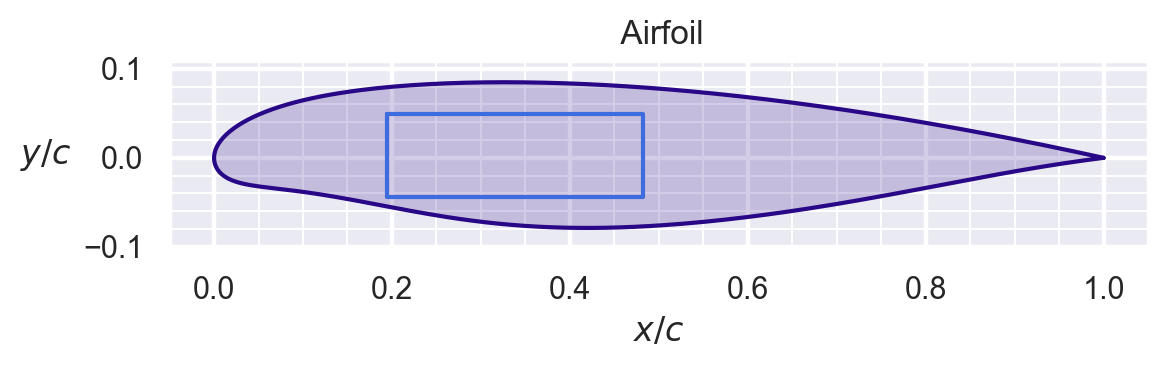

Step: 1, Action: [[ 1.          1.          1.          1.          1.          1.
   0.90050924  1.          1.          0.84315145 -0.89472574  0.6170292
  -0.7149967  -0.5167808  -1.         -1.         -1.         -1.
  -0.21116696 -0.33831424  0.21913198]], Reward: [0.53146815], Done: [False], Info: [{'step': 2, 'efficiency': 31.24442448790054, 'cl': 0.3486712447083241, 'TimeLimit.truncated': False}]


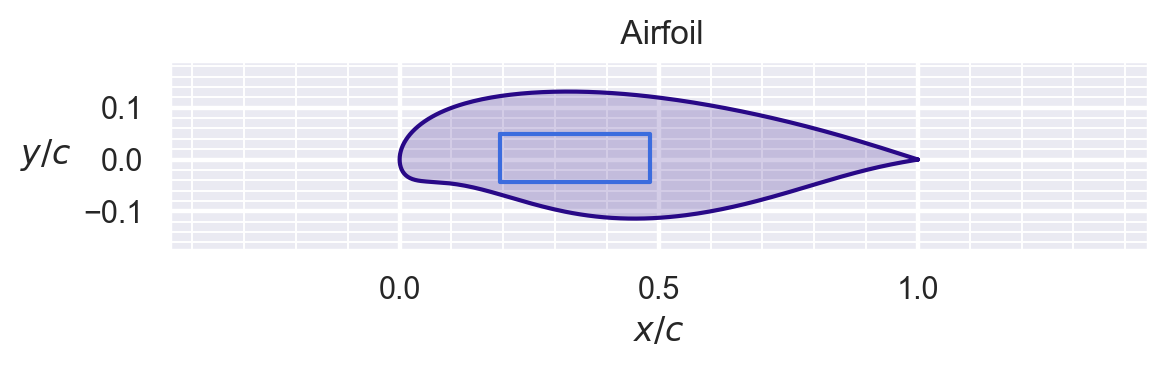

Step: 2, Action: [[ 0.56997514  0.28386283  0.9562377   1.          1.          0.36128
  -0.33364195  0.20810539  0.25810894  0.24167398 -0.37316948  0.577003
  -0.1401161  -0.05543322 -1.         -1.         -1.         -0.37641945
   0.22956584 -0.3178546  -0.16475832]], Reward: [32.251812], Done: [False], Info: [{'step': 3, 'efficiency': 44.18342707606469, 'cl': 0.6745457099936031, 'TimeLimit.truncated': False}]


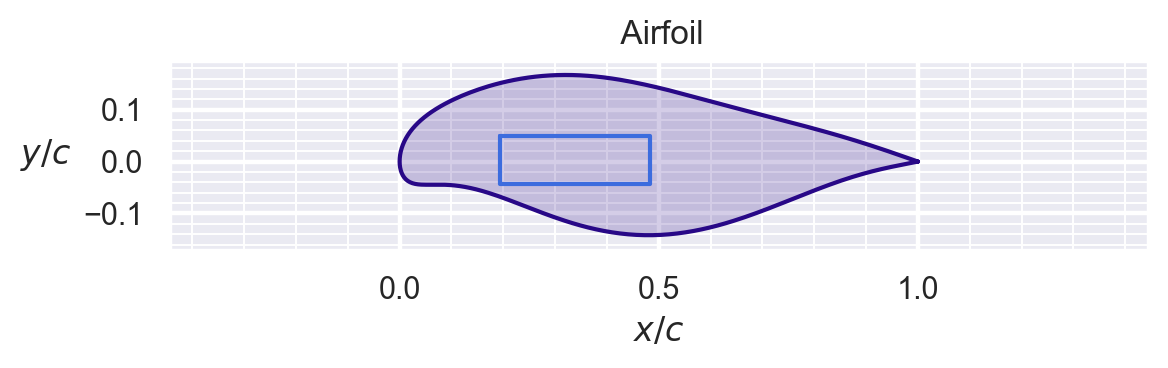

Step: 3, Action: [[ 5.39169759e-02 -1.63412839e-02  3.18967104e-01  7.78651357e-01
   8.00208747e-01 -2.76771933e-02 -3.75101626e-01 -4.61001396e-02
  -2.25189626e-02 -4.46428433e-02 -1.18112504e-01 -1.17683664e-01
  -1.36468977e-01 -3.81462276e-04 -4.67906982e-01 -5.38377702e-01
  -3.63121837e-01  2.81296670e-03  2.86480725e-01 -9.62005258e-02
  -2.60834396e-01]], Reward: [45.383045], Done: [False], Info: [{'step': 4, 'efficiency': 45.632179610163696, 'cl': 0.7834552434233715, 'TimeLimit.truncated': False}]


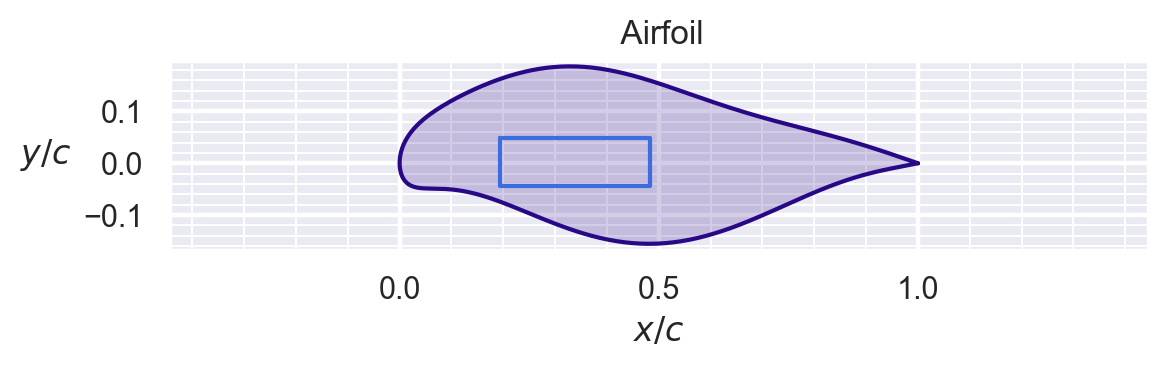

Step: 4, Action: [[-0.00339012  0.18860878  0.03462309  0.03343755  0.09922077 -0.0857304
  -0.09473284  0.02288486 -0.0889311  -0.12390339 -0.03061751 -0.17231432
   0.11246489  0.07880621 -0.09385354 -0.11828004 -0.06325333  0.11241358
   0.14201549  0.02903156 -0.07848766]], Reward: [44.41544], Done: [False], Info: [{'step': 5, 'efficiency': 44.78088905898188, 'cl': 0.7797585257203827, 'TimeLimit.truncated': False}]


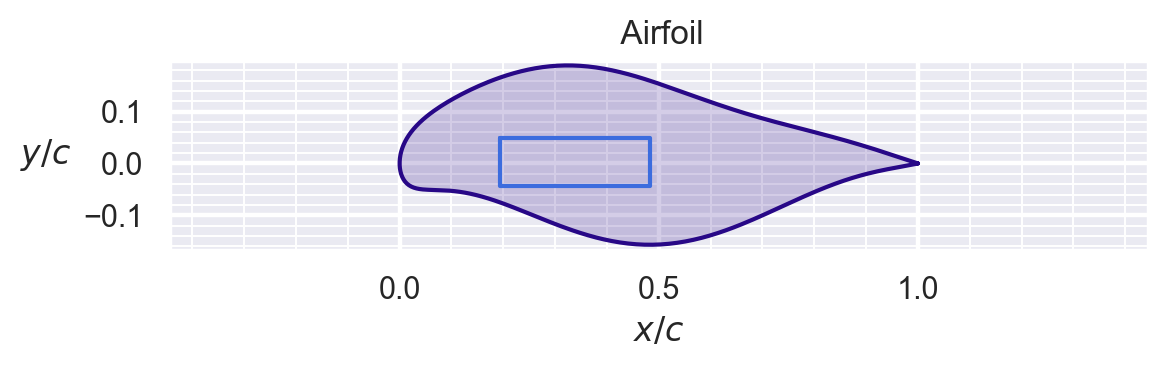

Step: 5, Action: [[ 0.03174371  0.07822511 -0.02695075 -0.00647919  0.05714609 -0.05468008
  -0.02852711  0.05804649 -0.05737406 -0.07462005  0.00056623 -0.0775585
   0.11983214  0.06688888 -0.02075838 -0.05889118 -0.04031425  0.10575553
   0.0936708   0.02983825 -0.02114348]], Reward: [44.55468], Done: [False], Info: [{'step': 6, 'efficiency': 44.88954062517397, 'cl': 0.7806510339796122, 'TimeLimit.truncated': False}]


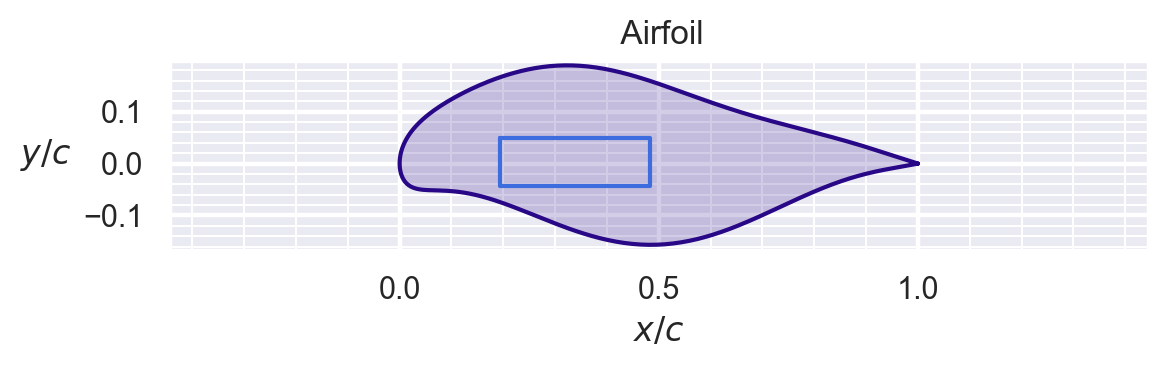

Step: 6, Action: [[ 2.0422921e-02  4.1091844e-02 -1.1949033e-02 -3.8839728e-03
   3.7410505e-02 -3.5606027e-02 -7.3501617e-03  5.5462644e-02
  -4.0656500e-02 -4.8892073e-02  8.7510794e-03 -6.2002048e-02
   7.3934957e-02  4.6706475e-02  7.3201954e-05 -3.6945626e-02
  -2.1616608e-02  9.0536050e-02  6.0618475e-02  1.1292800e-02
  -1.1281842e-02]], Reward: [44.713013], Done: [False], Info: [{'step': 7, 'efficiency': 45.047684247093436, 'cl': 0.7806907085432038, 'TimeLimit.truncated': False}]


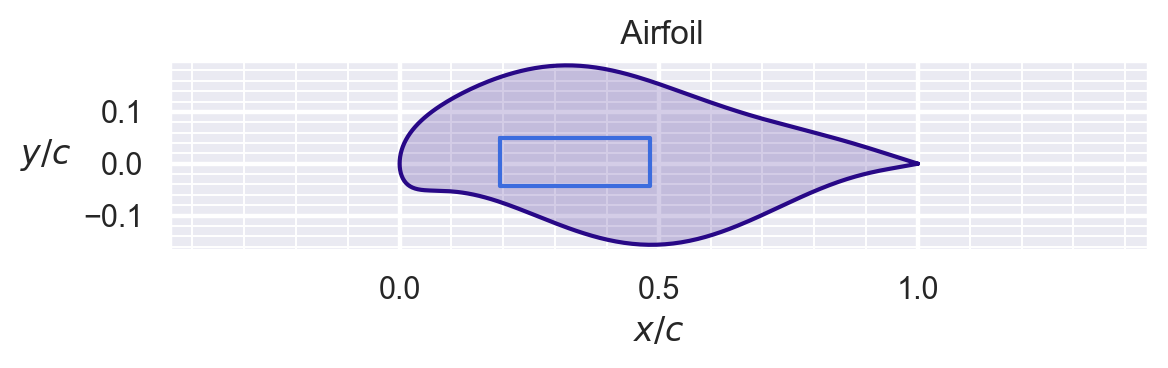

Step: 7, Action: [[ 0.01688728  0.02627209 -0.00376227  0.00083284  0.02804119 -0.02435012
  -0.00039853  0.04676349 -0.03092912 -0.03288009  0.0065314  -0.0410808
   0.05017315  0.03498354  0.00585868 -0.02701891 -0.01340603  0.07441623
   0.03898501 -0.00010969 -0.00227513]], Reward: [44.85588], Done: [False], Info: [{'step': 8, 'efficiency': 45.172599082170215, 'cl': 0.7812436989255926, 'TimeLimit.truncated': False}]


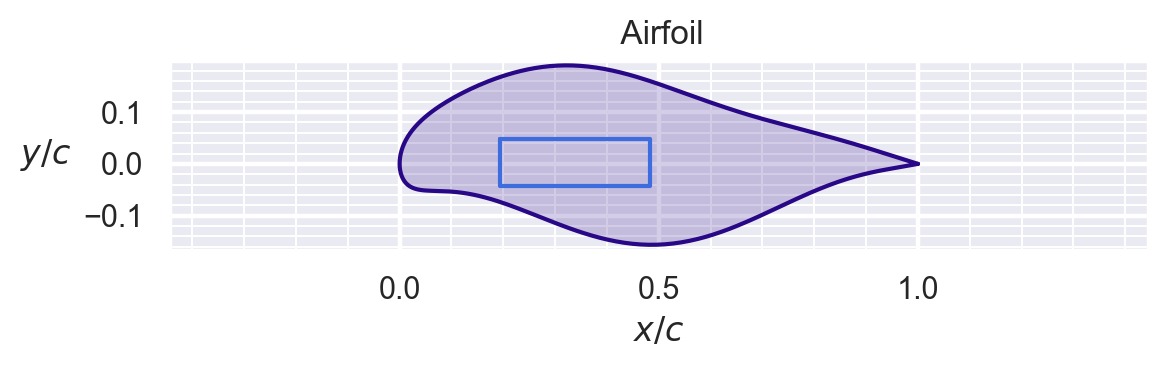

Step: 8, Action: [[ 0.0128172   0.01822464 -0.00072461  0.00283152  0.02116017 -0.01769786
   0.00213261  0.03722163 -0.02373371 -0.02314415  0.00286716 -0.03035938
   0.03190945  0.02512795  0.00629252 -0.02026654 -0.00851624  0.06034312
   0.02476504 -0.00648962  0.00223533]], Reward: [44.953537], Done: [False], Info: [{'step': 9, 'efficiency': 45.25219970317692, 'cl': 0.7818040256135033, 'TimeLimit.truncated': False}]


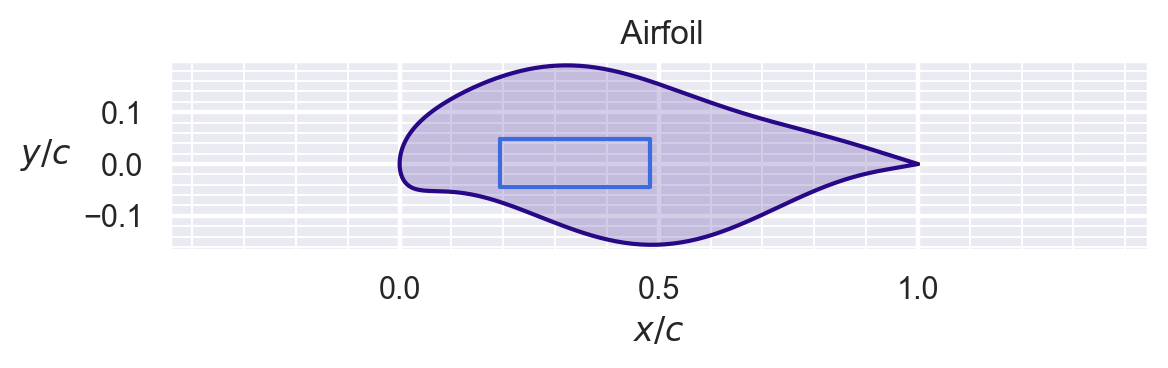

Step: 9, Action: [[ 0.00955823  0.01334861  0.00012538  0.00357786  0.01613519 -0.01367284
   0.00276788  0.02909146 -0.01852158 -0.01685693  0.00016227 -0.0218135
   0.02089764  0.01849271  0.00525411 -0.01546974 -0.00622172  0.0484039
   0.01515006 -0.0096617   0.00505216]], Reward: [45.020473], Done: [False], Info: [{'step': 10, 'efficiency': 45.30018312446045, 'cl': 0.7824021063888593, 'TimeLimit.truncated': False}]


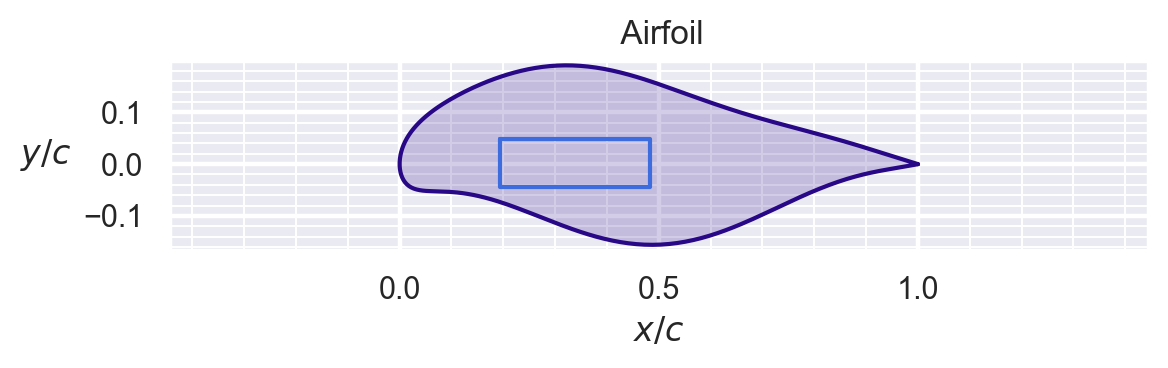

Step: 10, Action: [[ 6.6943467e-03  1.0014027e-02  7.0422888e-05  3.4775883e-03
   1.2300745e-02 -1.0961443e-02  2.7479678e-03  2.2549093e-02
  -1.4558092e-02 -1.2717776e-02 -1.3751984e-03 -1.6107470e-02
   1.3580948e-02  1.3757192e-02  4.0466040e-03 -1.1647746e-02
  -5.0257593e-03  3.8605466e-02  8.7024979e-03 -1.0818601e-02
   6.4065885e-03]], Reward: [45.06496], Done: [False], Info: [{'step': 11, 'efficiency': 45.32817104076963, 'cl': 0.7829358986868142, 'TimeLimit.truncated': False}]


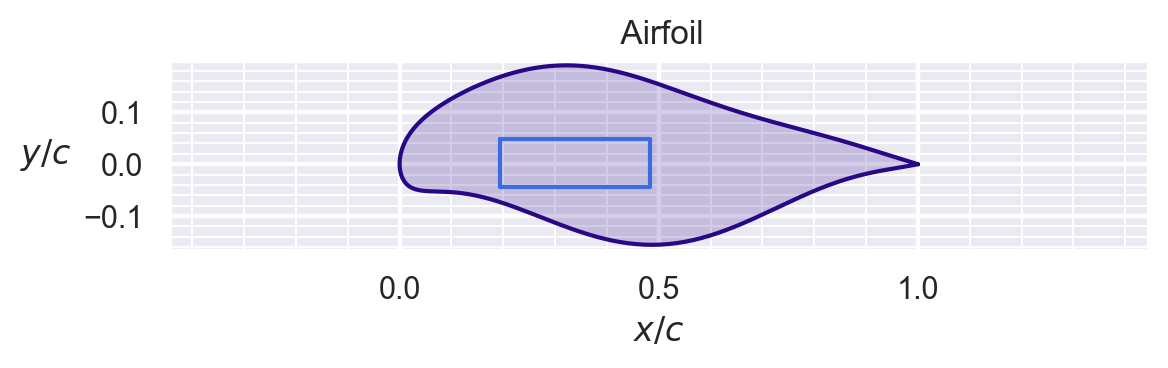

Step: 11, Action: [[ 0.00446019  0.00764464 -0.00021106  0.00306119  0.00944312 -0.00896682
   0.00247428  0.01745896 -0.0115456  -0.00987829 -0.00208037 -0.01192001
   0.0089253   0.01048722  0.00306479 -0.00859968 -0.00441287  0.0306754
   0.00442679 -0.01077949  0.00694143]], Reward: [45.095688], Done: [False], Info: [{'step': 12, 'efficiency': 45.34521539023828, 'cl': 0.7833897634464563, 'TimeLimit.truncated': False}]


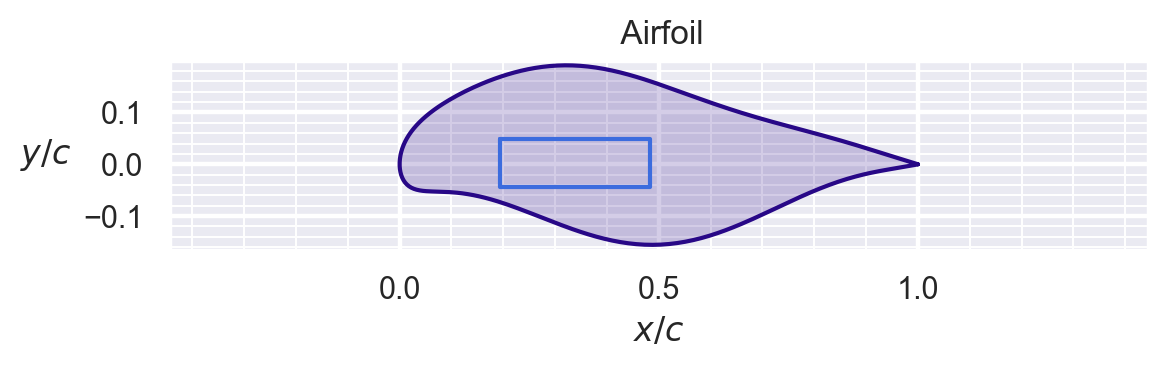

Step: 12, Action: [[ 0.00277667  0.00589988 -0.00047472  0.00254288  0.00731082 -0.00739288
   0.0021389   0.01353484 -0.00922309 -0.00786556 -0.00228854 -0.00892384
   0.0058634   0.00816432  0.00234725 -0.006171   -0.00402857  0.02433041
   0.0016606  -0.01007692  0.00692992]], Reward: [45.11783], Done: [False], Info: [{'step': 13, 'efficiency': 45.35660875363252, 'cl': 0.7837543631108486, 'TimeLimit.truncated': False}]


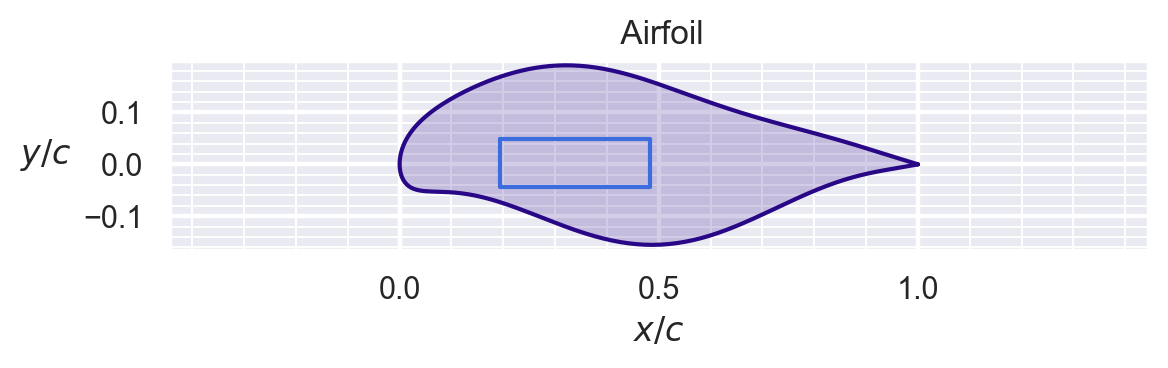

Step: 13, Action: [[ 1.5738904e-03  4.5923442e-03 -6.4319372e-04  2.0428896e-03
   5.7203770e-03 -6.1063617e-03  1.8108040e-03  1.0521084e-02
  -7.4185580e-03 -6.3857213e-03 -2.2323877e-03 -6.7243725e-03
   3.8487762e-03  6.4881369e-03  1.8399730e-03 -4.2775497e-03
  -3.7316233e-03  1.9284539e-02 -6.9208443e-05 -9.0518445e-03
   6.6010710e-03]], Reward: [45.13474], Done: [False], Info: [{'step': 14, 'efficiency': 45.365326684116134, 'cl': 0.7840376975281491, 'TimeLimit.truncated': False}]


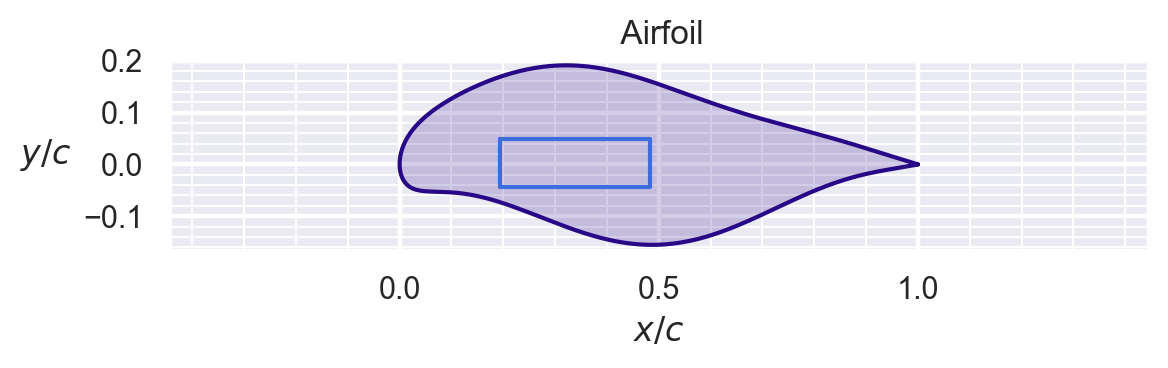

Step: 14, Action: [[ 0.0007453   0.0035959  -0.0007163   0.00160339  0.00452267 -0.00503714
   0.0015174   0.00820494 -0.00600155 -0.00526131 -0.00205074 -0.00510417
   0.00250186  0.00524267  0.00147817 -0.00283489 -0.00345443  0.01528775
  -0.00109559 -0.0079134   0.00609282]], Reward: [45.148315], Done: [False], Info: [{'step': 15, 'efficiency': 45.372825373822934, 'cl': 0.7842513970363032, 'TimeLimit.truncated': False}]


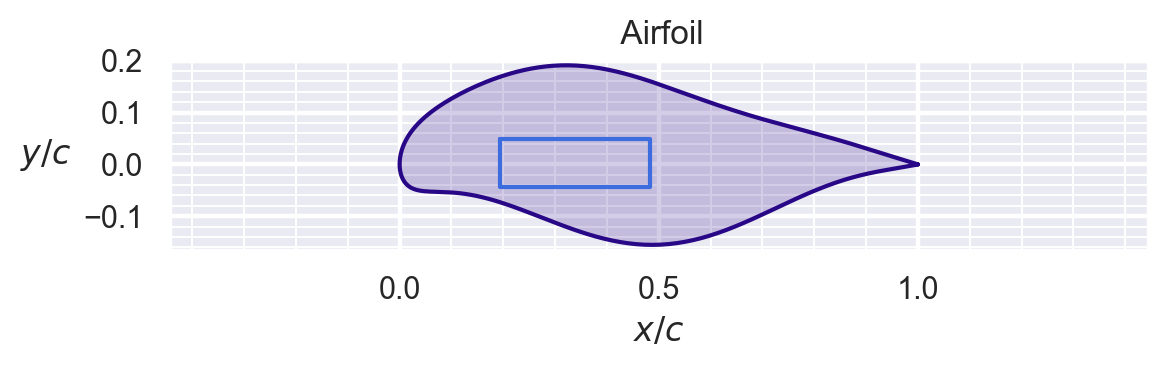

Step: 15, Action: [[ 0.00019872  0.00282747 -0.00071681  0.00123718  0.00361113 -0.00414467
   0.00126427  0.00642046 -0.00487833 -0.00438089 -0.00182022 -0.00389554
   0.00159578  0.00429323  0.00121144 -0.00176507 -0.0031766   0.01212823
  -0.00165297 -0.00678447  0.0055004 ]], Reward: [45.15966], Done: [False], Info: [{'step': 16, 'efficiency': 45.37974536639401, 'cl': 0.7844088569195166, 'TimeLimit.truncated': False}]


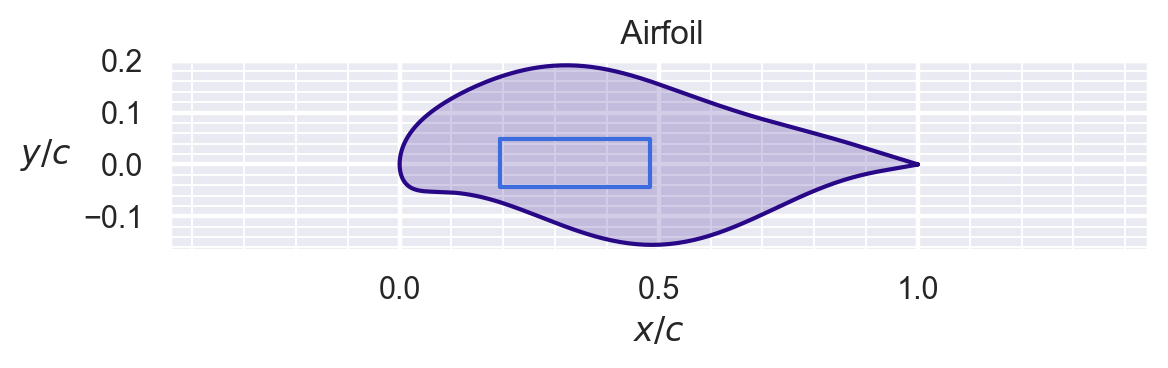

Step: 16, Action: [[-0.00014508  0.00222863 -0.00067037  0.00094041  0.00290667 -0.00340044
   0.0010498   0.00504082 -0.00398064 -0.0036741  -0.00158165 -0.00298694
   0.00098245  0.00355102  0.00100773 -0.00099299 -0.00289374  0.00963305
  -0.00190455 -0.00573251  0.00488349]], Reward: [45.169365], Done: [False], Info: [{'step': 17, 'efficiency': 45.38630297122786, 'cl': 0.7845222235089824, 'TimeLimit.truncated': False}]


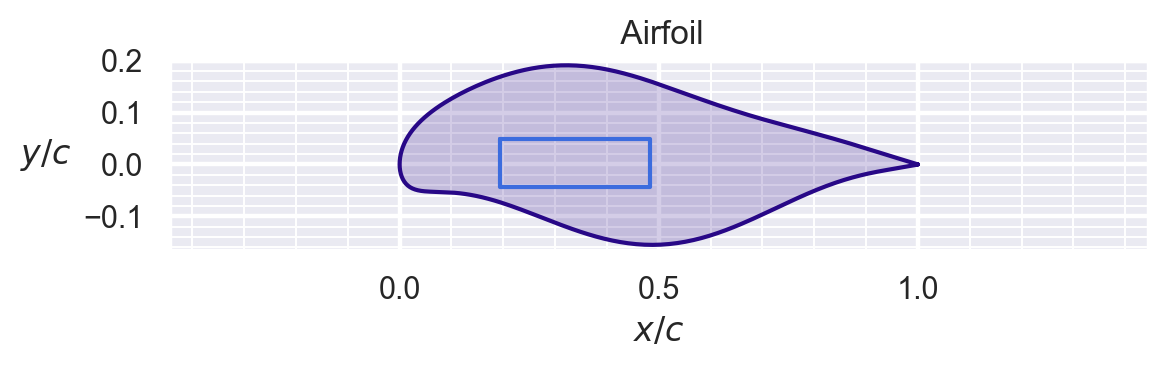

Step: 17, Action: [[-0.00034675  0.00175889 -0.0005984   0.00070445  0.00235499 -0.00278147
   0.00086962  0.00397034 -0.00325768 -0.00309523 -0.00135505 -0.00229883
   0.00056671  0.0029586   0.00084626 -0.00045342 -0.00260995  0.00766268
  -0.00196248 -0.00478947  0.00427973]], Reward: [45.17778], Done: [False], Info: [{'step': 18, 'efficiency': 45.39252348167114, 'cl': 0.7846019111663678, 'TimeLimit.truncated': False}]


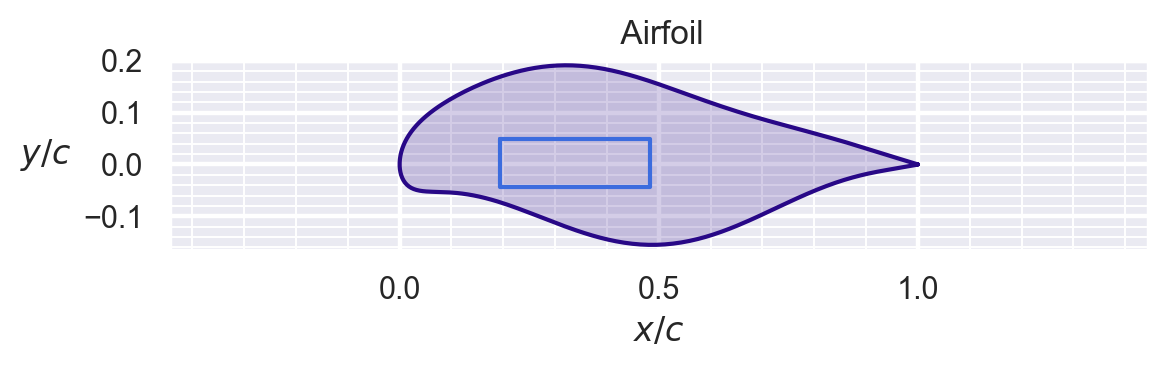

Step: 18, Action: [[-4.5128167e-04  1.3885349e-03 -5.1584840e-04  5.2028894e-04
   1.9177645e-03 -2.2690892e-03  7.1868300e-04  3.1365156e-03
  -2.6721358e-03 -2.6140884e-03 -1.1491477e-03 -1.7735511e-03
   2.8599799e-04  2.4775788e-03  7.1471184e-04 -9.0382993e-05
  -2.3314729e-03  6.1059222e-03 -1.9028559e-03 -3.9661974e-03
   3.7116017e-03]], Reward: [45.185104], Done: [False], Info: [{'step': 19, 'efficiency': 45.39836114092837, 'cl': 0.784656452852328, 'TimeLimit.truncated': False}]


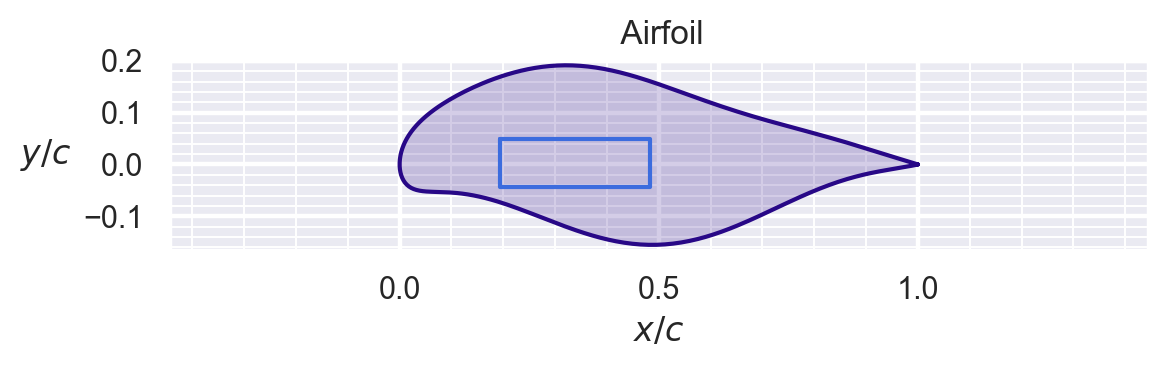

Step: 19, Action: [[-4.9184263e-04  1.0955185e-03 -4.3332577e-04  3.7834048e-04
   1.5676916e-03 -1.8457025e-03  5.9239566e-04  2.4849772e-03
  -2.1948367e-03 -2.2097826e-03 -9.6736848e-04 -1.3710707e-03
   9.8183751e-05  2.0816252e-03  6.0565770e-04  1.4173985e-04
  -2.0643249e-03  4.8745498e-03 -1.7765202e-03 -3.2610446e-03
   3.1908844e-03]], Reward: [45.191483], Done: [False], Info: [{'step': 20, 'efficiency': 45.403762515673975, 'cl': 0.7846925353280285, 'TimeLimit.truncated': False}]


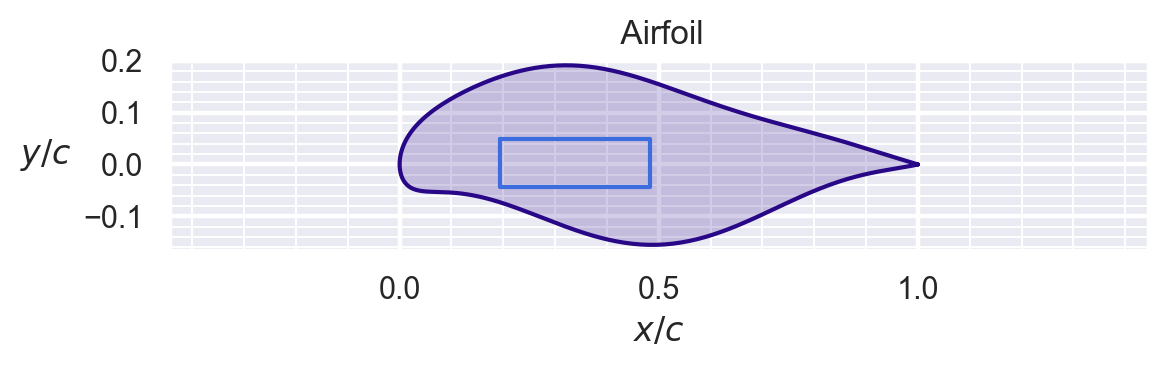

In [48]:

for i in range(20):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = vec_env.step(action)
    print(f"Step: {i}, Action: {action}, Reward: {rewards}, Done: {dones}, Info: {info}")
    vec_env.render()